In [264]:
from sympy import *
init_session() 

IPython console for SymPy 1.11.1 (Python 3.9.13-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [265]:
a,b,c,x,y,p,q,r,s,n = symbols('a b c x y p q r s n', integer=True)

In [266]:
f = x**2+n*y**2
f.subs([[x,p*x+q*y],[y,r*x+s*y]]).expand().factor([x,y])

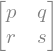

In [267]:
Matrix([[p,q],[r,s]])

In [268]:
eq1 = Eq(n*r**2 + p**2 + 2*p*q*r + q**2*r**2, a)
eq2 = Eq(2*n*r*s + 2*p*q*s + 2*q**2*r*s, b) 
eq3 = Eq(n*s**2 + q**2*s**2, c)
eq4 = Eq(p*s-q*r, -1)

for eq in [eq1,eq2,eq3,eq4]:
    eq = eq.subs(s,-1)
    pprint(eq)

solve([eq1,eq2,eq3,eq4],[p,q,r], dir=True)

   2    2              2  2    
n⋅r  + p  + 2⋅p⋅q⋅r + q ⋅r  = a
                    2      
-2⋅n⋅r - 2⋅p⋅q - 2⋅q ⋅r = b
     2    
n + q  = c
-p - q⋅r = -1


In [282]:
m = symbols('m', integer=True)
M_1 = Matrix([[0,-1],[1,0]])
M_2 = Matrix([[1,m],[0,1]])
M_3 = Matrix([[1,0],[0,-1]])
X = Matrix([[x],[y]])

In [287]:
class Mx:
    def __init__(self, N):
        self.N = N
    def transform(self, M):
        self.N = M.T * self.N * M
        return self
    def M1(self):
        self.transform(M_1)
        return self
    def M2(self, n):
        self.transform(M_2.subs(m,n))
        return self
    def convert(self):
        return (X.T * self.N * X)[0].factor()

In [341]:
# n = 14
F = Matrix([[-29,7],[141,-34]])
print(det(F))
N = Mx(Matrix([[1,0],[0,14]]))
N.transform(F).M1().M2(round(-134638/(2*16233))).M1().M2(round(4744/(2*351))).M1().M2(round(140/(2*14))).M1().convert()

-1
